In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BostonWeatherNov22.xlsx to BostonWeatherNov22.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['BostonWeatherNov22.xlsx']))
df

,Date_Nov,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Dew Point,Avg_Dew Point,Min_Dew Point,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Wind_Speed,Avg_ Wind_Speed,Min _Wind_Speed,Max_Pressure,Avg_Pressure,Min_Pressure,Total_Precipitation
0,1,64,61.0,57,60,57.5,54,100,88.3,80,12,7.7,5,30.0,29.9,29.9,0.04
1,2,69,58.9,53,56,48.3,38,90,70.2,38,13,6.9,0,30.4,30.2,30.0,0.00
2,3,60,54.1,47,51,43.3,35,86,67.4,49,14,6.6,0,30.4,30.4,30.3,0.00
3,4,71,60.1,51,58,52.4,48,97,77.6,47,22,12.6,6,30.4,30.3,30.3,0.00
4,5,76,66.2,58,64,60.2,56,97,82.2,60,17,11.6,5,30.3,30.2,30.2,0.00
5,6,76,69.9,66,65,62.7,59,93,79.0,58,24,15.8,12,30.2,30.2,30.1,0.00
6,7,75,67.4,55,64,45.9,17,90,53.8,16,23,14.7,9,30.3,30.1,30.0,0.00
7,8,54,48.8,40,31,22.4,16,49,36.2,24,21,13.8,8,30.6,30.5,30.3,0.00
8,9,48,43.0,36,38,29.7,22,79,59.9,49,13,8.3,0,30.6,30.6,30.5,0.00
9,10,69,56.4,44,52,44.0,39,89,66.1,38,22,14.8,10,30.4,30.2,30.1,0.00


In [ ]:
df.describe

<bound method NDFrame.describe of     Date_Nov  Max_Temperature  Avg_Temperature  Min_Temperature  \
0          1               64             61.0               57   
1          2               69             58.9               53   
2          3               60             54.1               47   
3          4               71             60.1               51   
4          5               76             66.2               58   
5          6               76             69.9               66   
6          7               75             67.4               55   
7          8               54             48.8               40   
8          9               48             43.0               36   
9         10               69             56.4               44   
10        11               70             63.3               55   
11        12               76             67.6               56   
12        13               56             50.3               42   
13        14               4

In [ ]:
df.shape

(30, 17)

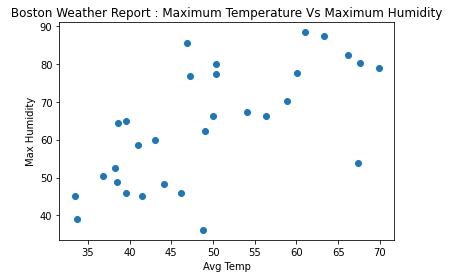

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.Avg_Humidity)
plt.title(' Boston Weather Report : Maximum Temperature Vs Maximum Humidity ')
plt.xlabel('Avg Temp')
plt.ylabel('Max Humidity')
plt.show()

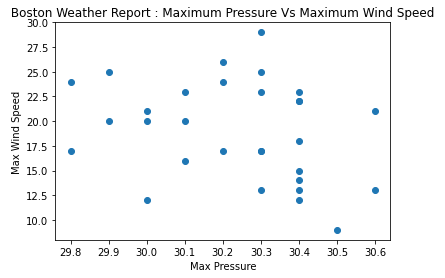

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Max_Pressure, df.Max_Wind_Speed)
plt.title(' Boston Weather Report : Maximum Pressure Vs Maximum Wind Speed ')
plt.xlabel('Max Pressure')
plt.ylabel('Max Wind Speed')
plt.show()

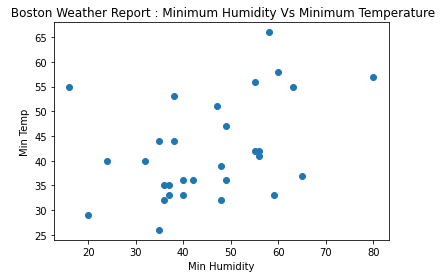

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Min_Humidity, df.Min_Temperature)
plt.title(' Boston Weather Report : Minimum Humidity Vs Minimum Temperature')
plt.xlabel('Min Humidity')
plt.ylabel('Min Temp')
plt.show()


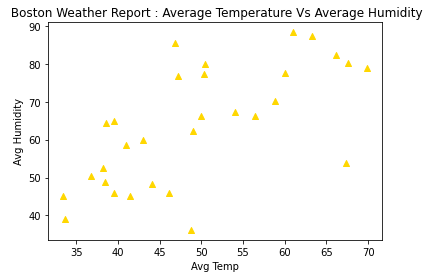

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.Avg_Humidity, color='gold', marker= '^')
plt.title(' Boston Weather Report : Average Temperature Vs Average Humidity')
plt.xlabel('Avg Temp')
plt.ylabel('Avg Humidity')
plt.show()

In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Max_Temperature, df.Max_Humidity))

LinregressResult(slope=0.8999451950341932, intercept=30.24640789191509, rvalue=0.6712325724163122, pvalue=4.9016314782176724e-05, stderr=0.1878135239113819, intercept_stderr=10.767957171918974)


LinregressResult(slope=0.8999451950341932, intercept=30.24640789191509, rvalue=0.6712325724163122, pvalue=4.9016314782176724e-05, stderr=0.1878135239113819, intercept_stderr=10.767957171918974)


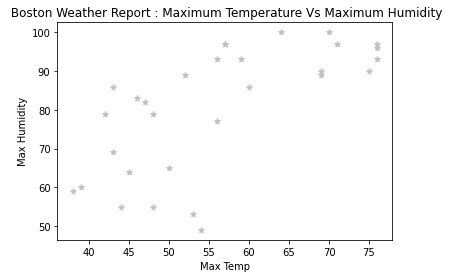

In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Max_Temperature, df.Max_Humidity))
plt.scatter(df.Max_Temperature, df.Max_Humidity, color='silver', marker= '*')
plt.title(' Boston Weather Report : Maximum Temperature Vs Maximum Humidity')
plt.xlabel('Max Temp')
plt.ylabel('Max Humidity')
plt.show()

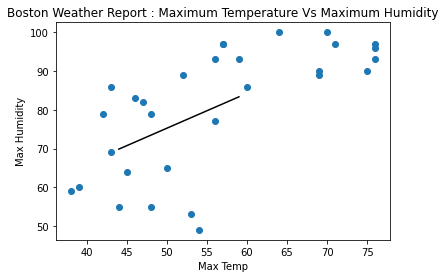

In [ ]:
# y = mx + b
# y = slope(x) + intercept

m, b, r, p, err = stats.linregress(df.Max_Temperature, df.Max_Humidity)
x = range(44, 60)
y = m * x + b
plt.plot(x, y, color='black')
plt.scatter(df.Max_Temperature, df.Max_Humidity)
plt.title('Boston Weather Report : Maximum Temperature Vs Maximum Humidity')
plt.xlabel('Max Temp')
plt.ylabel('Max Humidity')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='Max_Temperature~Max_Humidity', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

,LM stat,LM p,F stat,F stat p
White,0.200923,0.904420,0.091025,0.913274
Breusch-Pagan,0.192211,0.661083,0.180553,0.674146


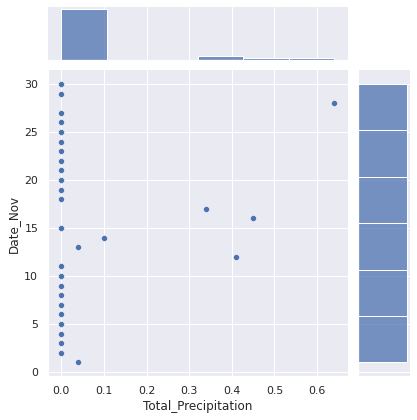

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df)

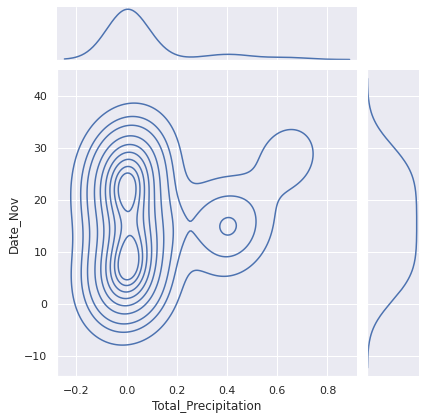

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df, kind= 'kde');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


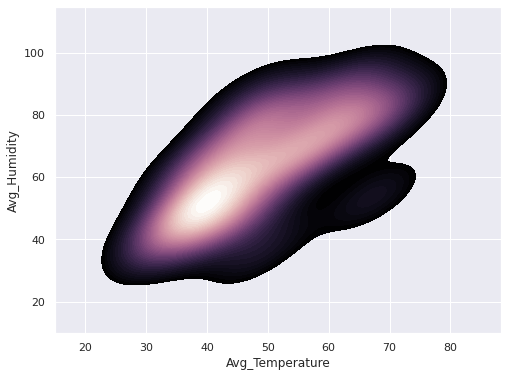

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.Avg_Temperature,df.Avg_Humidity, cmap=cmap, n_levels=60, shade=True)

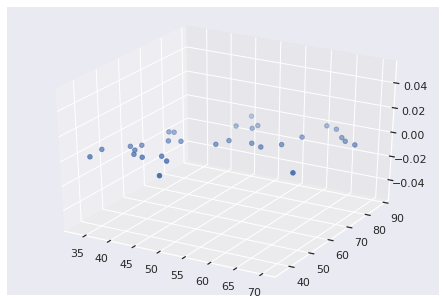

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

font = {'size': 8}
plt.rc('font', **font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.Avg_Temperature,df.Avg_Humidity)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Boston_form_response.xlsx to Boston_form_response.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Boston_form_response.xlsx']))
df

,City,Avg_Temperature,public_opinion,clothing,frequency_illness,heater_req,gas_electricity_usage
0,Boston,61.0,warm,t-shirt,normal,no,low
1,Boston,61.0,moderate,full-sleeves,feverish,yes,low
2,Boston,54.1,moderate,full-sleeves,normal,no,low
3,Boston,33.7,cold,jackets,extreme cough and cold,yes,high
4,Boston,66.2,warm,t-shirt,normal,no,low
5,Boston,69.9,warm,t-shirt,normal,no,low
6,Boston,67.4,warm,t-shirt,extreme cough and cold,yes,low
7,Boston,48.8,moderate,full-sleeves,extreme cough and cold,yes,high
8,Boston,43.0,cold,jackets,normal,yes,high
9,Boston,56.4,moderate,full-sleeves,extreme cough and cold,yes,high


In [ ]:
df.describe


<bound method NDFrame.describe of       City  Avg_Temperature public_opinion      clothing  \
0   Boston             61.0           warm       t-shirt   
1   Boston             61.0       moderate  full-sleeves   
2   Boston             54.1       moderate  full-sleeves   
3   Boston             33.7           cold       jackets   
4   Boston             66.2           warm       t-shirt   
5   Boston             69.9           warm       t-shirt   
6   Boston             67.4           warm       t-shirt   
7   Boston             48.8       moderate  full-sleeves   
8   Boston             43.0           cold       jackets   
9   Boston             56.4       moderate  full-sleeves   
10  Boston             66.2           warm       t-shirt   
11  Boston             41.0           cold       jackets   
12  Boston             50.3           warm       t-shirt   
13  Boston             39.5           cold       jackets   
14  Boston             38.2           cold       jackets   
15  Bo

In [ ]:
df.shape

(39, 7)

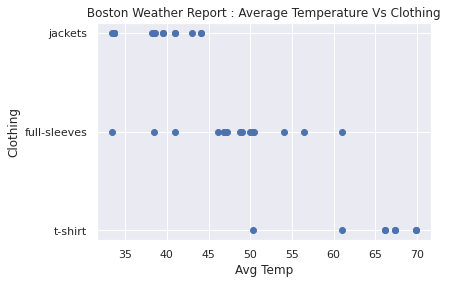

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.clothing)
plt.title(' Boston Weather Report : Average Temperature Vs Clothing ')
plt.xlabel('Avg Temp')
plt.ylabel('Clothing')
plt.show()

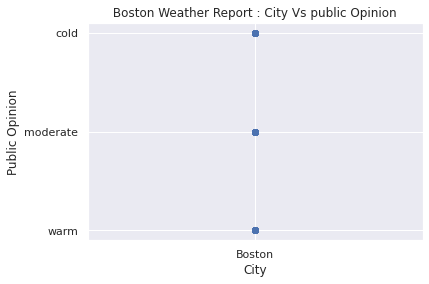

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.City, df.public_opinion)
plt.title(' Boston Weather Report : City Vs public Opinion ')
plt.xlabel('City')
plt.ylabel('Public Opinion')
plt.show()

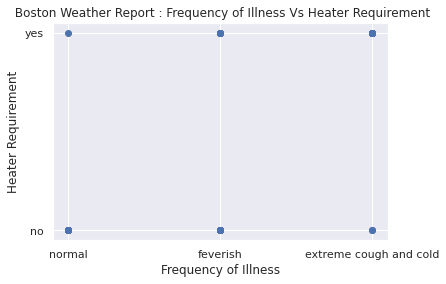

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.frequency_illness, df.heater_req)
plt.title(' Boston Weather Report : Frequency of Illness Vs Heater Requirement')
plt.xlabel('Frequency of Illness')
plt.ylabel('Heater Requirement')
plt.show()

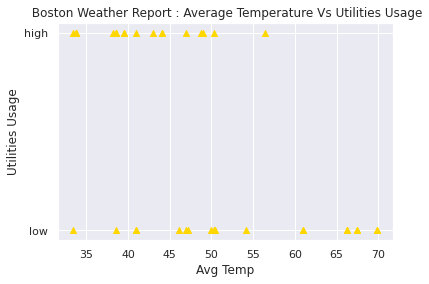

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.gas_electricity_usage, color='gold', marker= '^')
plt.title(' Boston Weather Report : Average Temperature Vs Utilities Usage')
plt.xlabel('Avg Temp')
plt.ylabel('Utilities Usage')
plt.show()

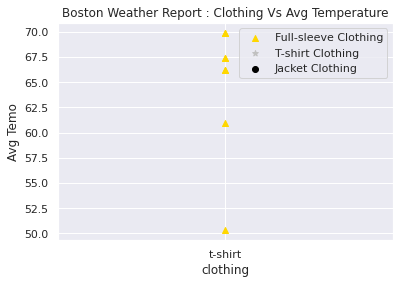

In [ ]:
df_fullsleeve = df[df['clothing'] == 't-shirt']
df_tshirt = df[df['clothing'] == 'full-sleeve']
df_jacket = df[df['clothing'] == 'jacket']

plt.scatter(df_fullsleeve.clothing, df_fullsleeve.Avg_Temperature, label='Full-sleeve Clothing', color='gold', marker= '^')
plt.scatter(df_tshirt.clothing, df_tshirt.Avg_Temperature, label='T-shirt Clothing', color='silver', marker= '*')
plt.scatter(df_jacket.clothing, df_jacket.Avg_Temperature, label='Jacket Clothing', color='black', marker= 'o')
plt.title('Boston Weather Report : Clothing Vs Avg Temperature')
plt.xlabel('clothing')
plt.ylabel('Avg Temo')
plt.legend()
plt.show()